In [51]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
%matplotlib inline


In [91]:
def med_med (true,fitted):
    temp = fitted - true
    return (np.median(np.abs(temp-np.median(temp))))



home = os.path.expanduser("~")

direc = os.listdir(".")

name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])


In [92]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])
red_chi_2_2 = np.abs(2*df['chi_2_2'])

In [93]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata2 = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata2)



In [94]:
df['tEp_true_2'] = df['tE_true']*np.sqrt(df['q_true'] + (df['rho']**2))
df['tEp_fitted_2'] = df['tEp_fitted']

In [95]:
med_med(df['s_true_log'],df['s_fitted_log'])

0.10020890761215001

In [96]:
med_med(np.log10(df['tEp_true_2']),np.log10(np.abs(df['tEp_fitted_2'])))

0.3986283823588779

In [97]:
df_new_test = df
df = df.reset_index()
for i in range(len(df)):
    if df['name'][i] in np.asarray(dd['name']):
        print i
        df = df.drop([i], axis=0)
print 'done'

50
61
78
87
127
129
154
161
162
166
179
208
213
218
272
284
286
293
324
360
369
429
432
464
495
500
558
560
561
563
597
605
623
651
662
667
670
677
683
694
704
706
768
769
774
820
840
889
1042
1067
1081
1149
1254
1312
1332
1339
1345
1353
1364
1395
1405
1436
1451
1468
1483
1606
1608
1644
1682
1699
1729
1761
1772
1776
1780
1840
1887
1890
1955
1988
2071
2077
2079
2096
2108
2111
2137
2139
2148
2160
2176
2187
2205
2277
2306
2312
2336
2386
2396
2405
2420
2425
2428
2439
2475
2524
2531
2560
2585
2608
2718
2725
2737
2738
2755
2811
2854
2901
2904
2910
2938
2941
2972
2989
3021
3061
3072
3077
3078
3081
3096
3102
3131
3136
3164
3199
3228
3240
3290
3309
3321
3345
3408
3479
3485
3524
3616
3624
3626
3628
3642
3645
3667
3675
3677
3700
3716
3758
3814
3820
3831
3836
3883
3912
3935
3946
3947
3948
3950
3953
3982
3984
3987
4027
4066
4091
4097
4099
4109
4112
4115
4120
4121
4137
4142
4149
4157
4171
4198
4225
4226
4233
4243
4245
4248
4249
4267
4268
4272
4298
4353
4368
4371
4391
4399
4402
4409
4446
4450
4466
44

In [98]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df_org = df
df['q_fitted_log'][df['q_fitted_log']>0] = np.log10( 1/df['q_fitted'][df['q_fitted_log']>0] )
df['q_fitted'][df['q_fitted_log']>0] = ( 1/df['q_fitted'][df['q_fitted_log']>0] )



df = df[((red_chi_2_1-red_chi_2_2)>160)]
print (len(df))




12314
6080


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [99]:
df = df[np.abs(df['u0_fitted'])>0.045] #02/20/2018
df = df[df['s_fitted']<5]
print(len(df))

4659


In [100]:
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])) - 
           np.median(np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])))

# Merging all above lists. a is absolute deviation from median for all targets with respect to their own distributions
frames1 = [x1,x4]
frames2 = [x2,x3]
frames3 = [x1,x2,x3,x4]
a_one_one = np.median(pd.concat(frames1))
a_curve = np.median(pd.concat(frames2))
a_total = np.median(pd.concat(frames3))

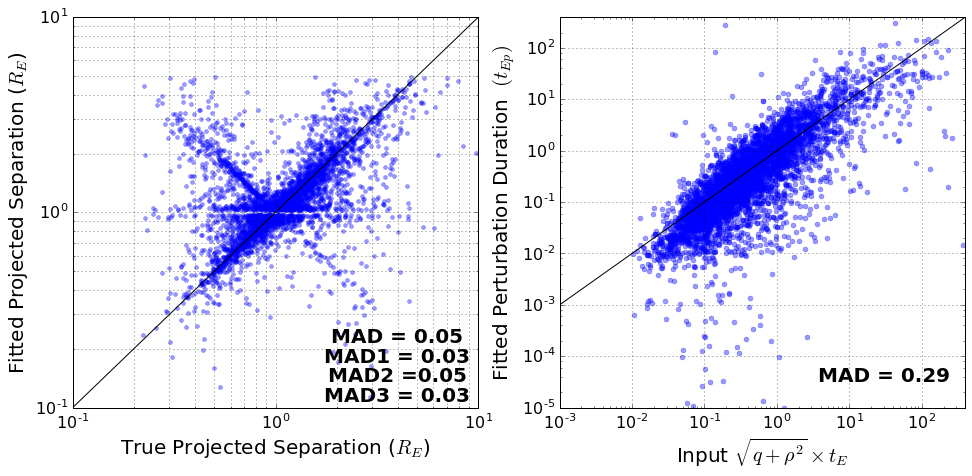

In [101]:
MAD_x = 0.8
MAD_y = 0.08
plt.close()

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)

#axarr[0].set_title('Projected Separation' ,size=26)

axarr[0].loglog (df['s_true'],df['s_fitted'],'b.',label='_nolegend_',markersize=8 , alpha = 0.4)
#axarr[0].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)
#
axarr[0].loglog ((0.1,10),(0.1,10),'k-',label='_nolegend_')
axarr[0].set_xlim((0.1,10))
axarr[0].set_ylim((0.1,10))
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x, MAD_y+0.1, 'MAD = '+str(round(med_med(np.log10(np.abs(df['s_true'])),np.log10(np.abs(df['s_fitted']))),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y+0.05, 'MAD1 = '+str(round(a_one_one,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y, 'MAD2 ='+str(round(a_curve,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y-0.05, 'MAD3 = '+str(round(a_total,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
axarr[0].set_xlabel('True Projected Separation ($R_E$)',size=20)
axarr[0].set_ylabel('Fitted Projected Separation ($R_E$)',size=20)
axarr[0].grid(b=True, which='minor')
axarr[0].grid(b=True, which='major')



#axarr[1].set_title('Mass Ratio ',size=26)
axarr[1].loglog (df['tEp_true_2'],df['tEp_fitted'],'b.',markersize=10,label='_nolegend_',alpha=0.4)
axarr[1].loglog (df['tEp_true_2'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
                 df['tEp_fitted'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
                 'r.', markersize=10,label='_nolegend_',alpha=0.4)


#axarr[1].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[1].loglog ((10**-3,400),( 10**-3,400),'k-',label='_nolegend_')
axarr[1].set_xlim((10**-3,400))
axarr[1].set_ylim(( 10**-5,400))
plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted']))),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)

axarr[1].set_xlabel( 'Input '+r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
axarr[1].set_ylabel('Fitted Perturbation Duration '+ r' $(t_{Ep})$',size=20)
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[1].grid()





f.set_size_inches(16,7)
#f.savefig(home+'/Desktop/result_q_s_after_smoothing_log_S.png')

In [45]:
MAD_s = med_med(df['s_true_log'],df['s_fitted_log'])
MAD_q = med_med(np.log10(df['tEp_true_2']),np.log10(np.abs(df['tEp_fitted_2'])))

In [23]:
# Out of 2 MADs for tEP
len(df['tEp_true_2'][(np.log10(np.abs(df['tEp_fitted_2']))>np.log10(df['tEp_true_2'])+2*MAD_q) | 
                    (np.log10(np.abs(df['tEp_fitted_2']))<np.log10(df['tEp_true_2'])-2*MAD_q)])/float(len(df)) * 100

19.400675295441754

In [25]:
#Out of 2 MADs for s
len(df['s_true'][(df['s_fitted_log']>df['s_true_log']+ 2*MAD_s)|(df['s_fitted_log']<df['s_true_log']-2*MAD_s)])/float(len(df)) *100

33.033202025886325

In [26]:
#Out of 2 MADs for both tEp and s
len(df['s_true'][((df['s_fitted_log']>df['s_true_log']+ 2*MAD_s)|(df['s_fitted_log']<df['s_true_log']-2*MAD_s)) & 
                 ((np.log10(np.abs(df['tEp_fitted_2']))>np.log10(df['tEp_true_2'])+2*MAD_q) | 
                    (np.log10(np.abs(df['tEp_fitted_2']))<np.log10(df['tEp_true_2'])-2*MAD_q)) ])/float(len(df)) *100

8.033202025886325

In [34]:
#Out of 2 MADs for both tEp and s
len(df['s_true'][((df['s_fitted_log']>df['s_true_log']+ 2*MAD_s)|(df['s_fitted_log']<df['s_true_log']-2*MAD_s)) | 
                 ((np.log10(np.abs(df['tEp_fitted_2']))>np.log10(df['tEp_true_2'])+2*MAD_q) | 
                    (np.log10(np.abs(df['tEp_fitted_2']))<np.log10(df['tEp_true_2'])-2*MAD_q)) ])/float(len(df)) *100

44.40067529544176

In [46]:
sigma_s = 1.4826 * MAD_s
sigma_q = 1.4826 * MAD_q

In [47]:
# Out of 2 sigmas , sigma is the scaled MAD in log units
len(df['tEp_true_2'][(np.log10(np.abs(df['tEp_fitted_2']))>np.log10(df['tEp_true_2'])+2*sigma_q) | 
                    (np.log10(np.abs(df['tEp_fitted_2']))<np.log10(df['tEp_true_2'])-2*sigma_q)])/float(len(df)) * 100

9.882654932159882

In [48]:
# Out of one sigma, sigma is the scaled MAD in log units
len(df['s_true'][(df['s_fitted_log']>df['s_true_log']+ 2*sigma_s)|(df['s_fitted_log']<df['s_true_log']-2*sigma_s)])/float(len(df)) *100

24.99083241657499

In [49]:
#Out of 2 sigmas, sigma is the scaled MAD in log units
len(df['s_true'][((df['s_fitted_log']>df['s_true_log']+ 2*sigma_s)|(df['s_fitted_log']<df['s_true_log']-2*sigma_s)) & 
                 ((np.log10(np.abs(df['tEp_fitted_2']))>np.log10(df['tEp_true_2'])+2*sigma_q) | 
                    (np.log10(np.abs(df['tEp_fitted_2']))<np.log10(df['tEp_true_2'])-2*sigma_q)) ])/float(len(df)) *100

3.667033370003667

In [50]:
#Out of 2 sigmas, sigma is the scaled MAD in log units
len(df['s_true'][((df['s_fitted_log']>df['s_true_log']+ 2*sigma_s)|(df['s_fitted_log']<df['s_true_log']-2*sigma_s)) | 
                 ((np.log10(np.abs(df['tEp_fitted_2']))>np.log10(df['tEp_true_2'])+2*sigma_q) | 
                    (np.log10(np.abs(df['tEp_fitted_2']))<np.log10(df['tEp_true_2'])-2*sigma_q)) ])/float(len(df)) *100

31.206453978731208